# ODE
We now have the following equation
$$
y'(t)=f(t,y(t))
$$
where we numerically need to approximate the solution via an approximation of the time derivative
$$
y'(t)=\frac{y(t+h)-y(t)}{h}=f(t,y(t))
$$
and we start from the initial value $y_0$. 

## 1. Explicit Euler
This initial condition now propagates over time via reformulating the above to an iteration 
$$
y(t+h)=y(t)+hf(t,y(t))
$$
and since the values $y(t)$ refer to exact solution evaluated at different times we now introduce the notation $y_k\approx y(kh)$ and arrive at the first method for solving the ODE
$$
y_{k+1}=y_k+hf(t_k,y_k).
$$
This is the so-called **explicit Euler** method as the approximation of the new solution only depends on *old* values.

In [74]:
#forward/explicit Euler method
def euler(t0,T,y0,h):
    N = int((T-t0)/h)
    y = np.zeros(N)
    t = np.zeros(N)
    y[0] = y0
    t[0] = t0
    for n in range(1,N):
        y[n] = y[n-1] + h*f(t[n-1],y[n-1])
        t[n] = t[n-1] + h
    return t, y

### Example

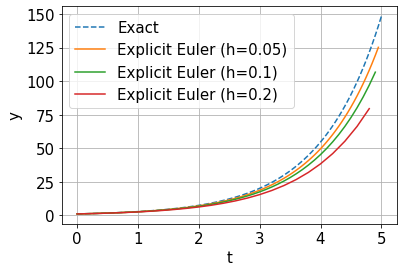

In [75]:
# Equetion and initial
def f(t,y):
    return y
t0,T,y0 = 0.0,5.0,1.0


#By calcules methods
te = np.linspace(t0,T,100)
def yexact(t):
    return np.exp(t)
ye = yexact(te)
plt.plot(te,ye,'--',label='Exact')


#By Explicit Euler Method for sevral h
H = [0.05,0.1,0.2]

for h in H:
    t,y = euler(t0,T,y0,h)
    plt.plot(t,y,label=f'Explicit Euler (h={h})')

#Plot
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.grid(True);

## Example

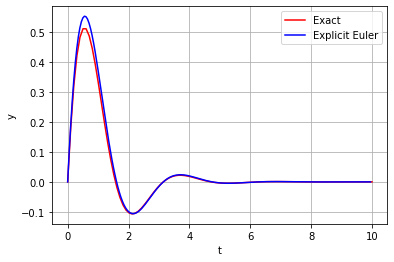

In [52]:
# Equetion and initial
def f(t,y):
    return -y + 2.0*np.exp(-t)*np.cos(2.0*t)
t0,T,y0, h = 0,10,0,1/20


#By Explicit Euler Method
t,y = euler(t0,T,y0, h)

#By calcules methods
def yexact(t):
    return np.exp(-t)*np.sin(2.0*t)
te = np.linspace(0,10,100)
ye = yexact(te)

#Plot
plt.plot(te,ye ,'r-',label='Exact')
plt.plot(t,y,'b-',label='Explicit Euler')


plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.grid(True);

## Example

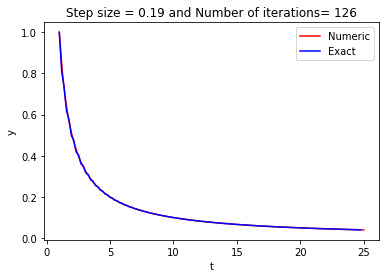

In [53]:
def f(t,y):
    return -5.0*t*y**2 + 5.0/t - 1.0/t**2
t0, y0, T, h = 1.0, 1.0, 25, 0.19 # also test h=0.22


t,y = euler(t0,T,y0,h)

def yexact(t):
    return 1.0/t
te = np.linspace(t0,T,100)
ye = yexact(te)

#Plot
plt.plot(te,ye ,'r-',label='Numeric')
plt.plot(t,y,'b-',label='Exact')

plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title(f'Step size = {h} and Number of iterations= {len(t)}');

# 2. Explicit Euler (adaptive)
We will use a variable time step
$$
y_n = y_{n-1} + h_{n-1} f(t_{n-1}, y_{n-1})
$$
where
$$
h_{n-1} = \frac{1}{|f_y(t_{n-1},y_{n-1})|} = \frac{1}{10 t_{n-1} |y_{n-1}|}
$$

In [54]:
def aeuler(t0,T,y0):
    # Forward Euler with adaptive time-stepping
    t, y = [], []
    y.append(y0)
    t.append(t0)
    time = t0; n = 1
    while time < T:
        h    = 1.0/np.abs(10*t[n-1]*y[n-1])
        y.append(y[n-1] + h*f(t[n-1],y[n-1]))
        time = time + h
        t.append(time)
        n = n + 1
    return np.array(t), np.array(y)

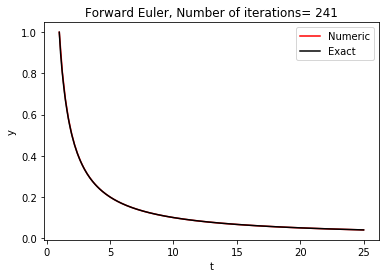

In [55]:
t0, y0, T = 1.0, 1.0, 25
t,y = aeuler(t0,T,y0)

te = np.linspace(t0,T,100)
ye = yexact(te)

plt.plot(te,ye ,'r-',label='Numeric')
plt.plot(t,y,'k-',label='Exact')

plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title(f'Forward Euler, Number of iterations= {len(t)}');

# 3. Implicit Euler
Now there seems to be a problem with our *explicit Euler* method and we consider a different version, namely, the **implicit Euler** scheme
$$
y(t+h)=y(t)+hf(t+h,y(t+h))
$$
and since the values $y(t)$ refer to exact solution evaluated at different times we now introduce the notation $y_k\approx y(kh)$ and arrive at the first method for solving the ODE
$$
y_{k+1}=y_k+hf(t_{k+1},y_{k+1}).
$$
This in general means solving a system to obtain the new point $y_{k+1}$ and then we get for our particular problem
$$
y_{k+1}=y_k+hy_{k+1}\Rightarrow y_{k+1}=\frac{y_k}{1-h}
$$

In [56]:
def ieuler(t0,T,y0,h):
    N = int((T-t0)/h)
    y = np.zeros(N)
    t = np.zeros(N)
    y[0] = y0
    t[0] = t0
    for n in range(1,N):
        y[n] = y[n-1]/(1-h)
        t[n] = t[n-1] + h
    return t, y

### Example 1

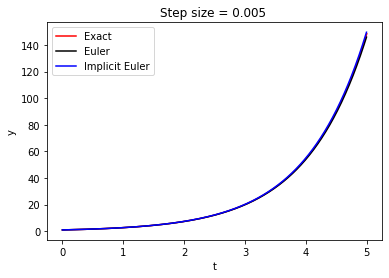

In [57]:
def f(t,y):
    return y
t0,T,y0,h = 0.0,5.0,1.0,0.005

#Implicit Euler
t_i,y_i = ieuler(t0,T,y0,h)

#Euler
t_e,y_e = euler(t0,T,y0,h)

#Exact
def yexact(t):
    return np.exp(t)
te = np.linspace(t0,T,100)
ye = yexact(te)

#Plot
plt.plot(te,ye ,'r-',label='Exact')
plt.plot(t_e,y_e,'k-',label='Euler')
plt.plot(t_i,y_i,'b-',label='Implicit Euler')


plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title(f'Step size = {h} ');

# 4. Use odeint 

## Example

Text(0, 0.5, 'y')

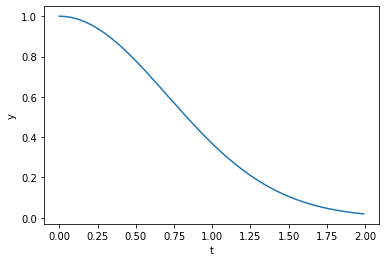

In [60]:
%matplotlib inline
from scipy.integrate import odeint
import numpy as np
import pylab 

def f(y, t):
    """this is the rhs of the ODE to integrate, i.e. dy/dt=f(y,t)"""
    return -2 * y * t

y0 = 1             # initial value
t0 = 0              # integration limits for t
T = 2

t = np.arange(t0, T, 0.01)  # values of t for which we require the solution y(t)
y = odeint(f, y0, t)  # actual computation of y(t)


# plotting of results
pylab.plot(t, y)
pylab.xlabel('t')
pylab.ylabel('y')


## Example Solving the pendulum equation

In this example, the second order differential equation for the angle $\theta$ of a pendulum acted on by gravity with friction is solved . The equations can be written as follows:
\begin{align}
\theta'(t)&=\omega(t)\\
\omega'(t)&=−b \ \omega(t)−c \ \mathrm{sin}(\theta(t))
\end{align}
hereafter, let:
$$
y(t)=
\left(
\begin{array}{c}
\theta(t)\\
\omega(t)\\
\end{array}
\right)
$$
with the boundary condition:
$$
y(0)=
\left(
\begin{array}{c}
\pi-0.1\\
0
\end{array}
\right)
$$
Firstly, define the function which returns dydt.

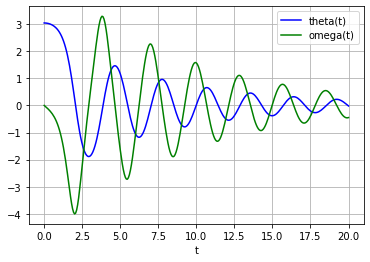

In [66]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def pend(y, t, b, c):
    # This is the right hand side function with two components
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

b = 0.25
c = 5.0
y0 = [np.pi - 0.1, 0.0]
t = np.linspace(0, 20, 301)

sol = odeint(pend, y0, t, args=(b, c))

plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

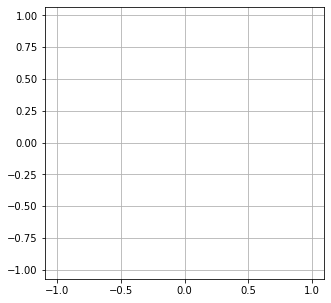

In [67]:
import matplotlib.animation as animation
fig = plt.figure(figsize=(5, 5), facecolor='w')
ax = fig.add_subplot(1, 1, 1)
plt.rcParams['font.size'] = 15

lns = []
for i in range(len(sol)):
    ln, = ax.plot([0, np.sin(sol[i, 0])], [0, -np.cos(sol[i, 0])],
                  color='k', lw=2)
    tm = ax.text(-1, 0.9, 'time = %.1fs' % t[i])
    lns.append([ln, tm])
ax.set_aspect('equal', 'datalim')
ax.grid()
ani = animation.ArtistAnimation(fig, lns, interval=50)


In [70]:
fn = 'odeint_single_pendulum_artistanimation'
#ani.save(fn+'.mp4',writer='ffmpeg',fps=1000/50)
#ani.save(fn+'.gif',writer='imagemagick',fps=1000/50)